<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/McCulloch%20Pitts%20Neuron/Iris/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of Iris Dataset as setosa and non - setosa species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split

##Load the Data

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data["class"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data = data[data.columns.difference(['sepal length (cm)','sepal width (cm)'])]

In [6]:
data["class"] = (data["class"]==0) * 1

In [7]:
data.describe()

,class,petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000
mean,0.333333,3.758000,1.199333
std,0.472984,1.765298,0.762238
min,0.000000,1.000000,0.100000
25%,0.000000,1.600000,0.300000
50%,0.000000,4.350000,1.300000
75%,1.000000,5.100000,1.800000
max,1.000000,6.900000,2.500000


In [8]:
data["class"].value_counts()

0    100
1     50
Name: class, dtype: int64

In [9]:
data.groupby('class').mean()

,petal length (cm),petal width (cm)
class,,
0,4.906,1.676
1,1.462,0.246


In [10]:
data.head()

,class,petal length (cm),petal width (cm)
0,1,1.4,0.2
1,1,1.4,0.2
2,1,1.3,0.2
3,1,1.5,0.2
4,1,1.4,0.2


In [11]:
X = data.drop('class', axis=1)
Y = data["class"]

##Train Test Split


In [12]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(150, 2) (135, 2) (15, 2)
(150,) (135,) (15,)


##Binarization

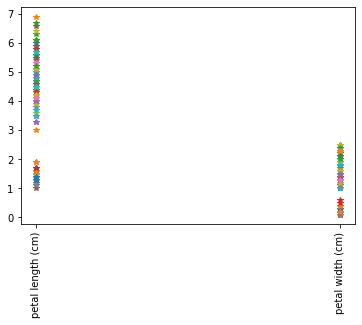

In [13]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[0,1])
#X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[0,1])

In [15]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[1,0])

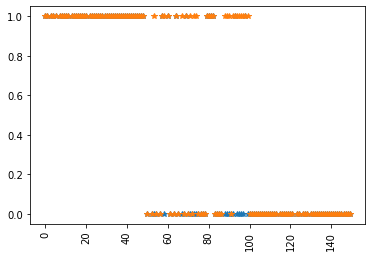

In [16]:
plt.plot(X_binarised_train,'*')
plt.xticks(rotation='vertical')
plt.show()

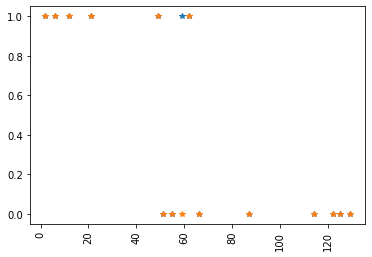

In [17]:
plt.plot(X_binarised_test,'*')
plt.xticks(rotation='vertical')
plt.show()

In [18]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [20]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##Inference and Search

In [21]:
b = 3
i = 100 
if(np.sum(X_binarised_train[100,:])>=b):
  print("Prediction : Flower is Setosa")
else:
   print("Prediction : Flower is not Setosa")

if(Y_train[i]==1):
  print("Ground Truth : Flower is Setosa")
else:
  print("Ground Truth : Flower is not Setosa")

Prediction : Flower is not Setosa
Ground Truth : Flower is not Setosa


In [22]:
b = 3
i = np.random.randint(0,X_binarised_train.shape[0])

print("For row i : ",i)

if(np.sum(X_binarised_train[100,:])>=b):
  print("Prediction : Flower is Setosa")
else:
  print("Prediction : Flower is not Setosa")

if(Y_train[i]==1):
  print("Ground Truth : Flower is Setosa")
else:
  print("Ground Truth : Flower is not Setosa")

For row i :  121
Prediction : Flower is not Setosa
Ground Truth : Flower is not Setosa


In [23]:
b = 3
y_pred_train = []
accurate_rows = 0
for x, y in zip(X_binarised_train,Y_train):
  y_pred = np.sum(x)>=b
  y_pred_train.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

Accuracy is :  0.6666666666666666


In [24]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = []
  accurate_rows = 0
  for x, y in zip(X_binarised_train,Y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y) 
  print("b = ",b," Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

b =  0  Accuracy is :  0.3333333333333333
b =  1  Accuracy is :  0.8148148148148148
b =  2  Accuracy is :  0.9259259259259259


In [25]:
b = 2
y_pred_test = []
accurate_rows = 0
for x, y in zip(X_binarised_test,Y_test):
  y_pred = np.sum(x)>=b
  y_pred_test.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_test.shape[0])

Accuracy is :  0.9333333333333333


##MP Neuron Class

In [26]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [27]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 2
Highest accuracy is 0.9259259259259259


In [28]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.9333333333333333
